<a href="https://colab.research.google.com/github/jhcool1988/teamdata/blob/master/marketpredmulty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from statsmodels.formula.api import ols

In [29]:
# 한글설정 1 폰트설치
!sudo apt-get install -y fonts-nanum  # 폰트설치
!sudo fc-cache -fy    # 폰트캐시 재구성
!rm ~/.cache/matplotlib -rf # matplotlib 캐시 제거

# 설치가 끝나면 코렙의 런타임을 다시 시작함

# 한글설정 2
plt.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
fc-cache: option requires an argument -- 'y'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v,

In [30]:
sal = pd.read_csv('https://raw.githubusercontent.com/jhcool1988/teamdata/master/soccerVF.csv')
sal.head(5)

# 파운드 물가상승률 반영

,playername,mvpr,marketvaluepound,season,age,lgrank,MP,starts,min,goal,assist,sh,sot,sotp,gsh,cmp,cmpp,crs,int,block,sca,passlive,drib,gca,gcapasslive,tkl,press,pressp,touches,succp,targ,rec,recp,miscon,fls,recov,aerialwonp
0,Aaron Connolly,3.299990e+06,3600000,2020,19,15,24,14,1258.0,3.0,1.0,38.0,13.0,34.2,0.08,126.0,77.3,9.0,4.0,NaN,22.0,7.0,3.0,5.0,1.0,12.0,234.0,29.5,349.0,37.5,535.0,235.0,43.9,42.0,16.0,54.0,22.6
1,Aaron Mooy,8.549647e+06,9000000,2018,26,16,36,34,3067.0,4.0,3.0,29.0,6.0,20.7,0.10,1547.0,74.7,187.0,30.0,NaN,69.0,51.0,0.0,7.0,6.0,81.0,558.0,26.0,2434.0,57.1,1634.0,1500.0,91.8,37.0,26.0,456.0,42.1
2,Aaron Mooy,1.175786e+07,12600000,2019,27,20,29,25,2330.0,3.0,1.0,39.0,13.0,33.3,0.05,1078.0,75.5,139.0,38.0,NaN,76.0,45.0,2.0,3.0,2.0,66.0,610.0,27.9,1728.0,56.6,1298.0,1112.0,85.7,32.0,26.0,283.0,28.6
3,Aaron Mooy,7.837476e+06,8550000,2020,28,15,32,26,2085.0,2.0,2.0,33.0,8.0,24.2,0.06,825.0,76.7,114.0,19.0,NaN,70.0,51.0,3.0,7.0,4.0,43.0,421.0,29.7,1359.0,72.5,1104.0,927.0,84.0,30.0,13.0,189.0,33.3
4,Abdoul Kader Bamba,1.466662e+06,1600000,2020,25,13,27,16,1468.0,1.0,3.0,19.0,9.0,47.4,0.00,571.0,79.2,55.0,14.0,25.0,71.0,42.0,6.0,6.0,2.0,28.0,306.0,27.8,960.0,56.1,882.0,704.0,79.8,40.0,20.0,129.0,33.3


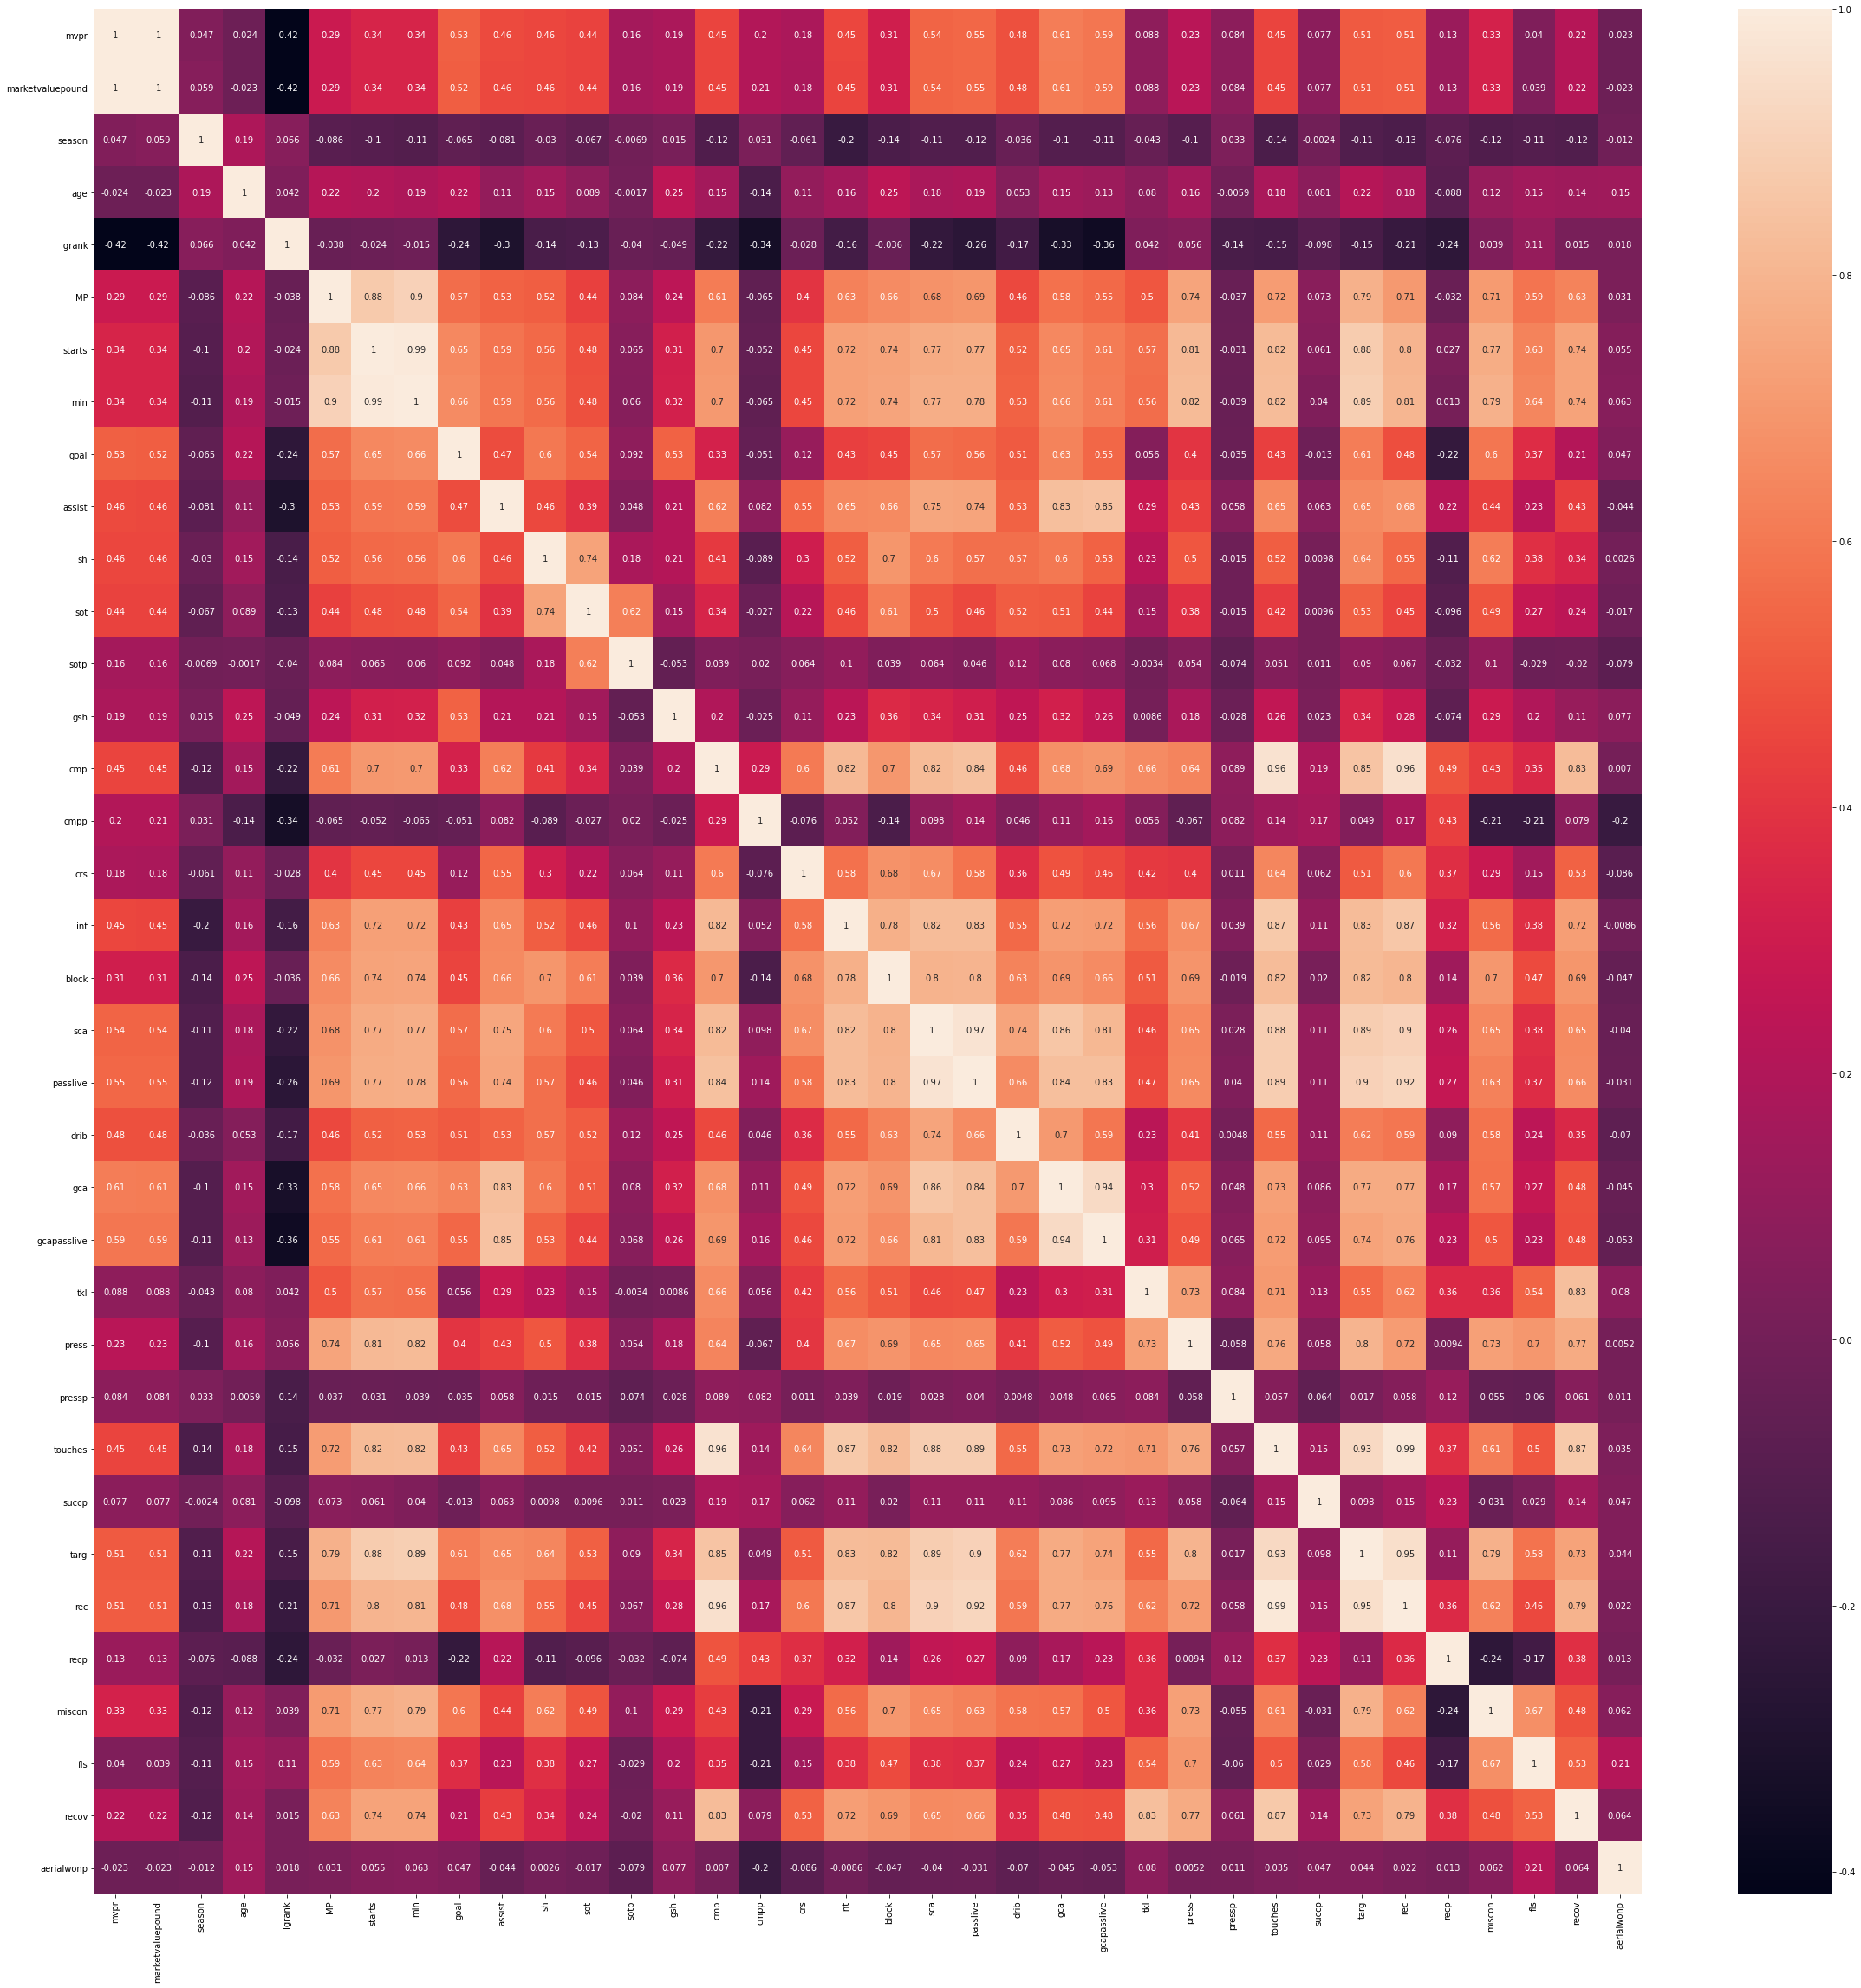

In [31]:
bscorr = sal.corr()
fig, axs = plt.subplots(figsize = (40,40))

sns.heatmap(bscorr, annot=True)

In [32]:
sal = sal[['mvpr','goal','assist','sh','cmp','int','sca','passlive','drib','gca','gcapasslive','touches','targ','rec']]
sal.head(5)

,mvpr,goal,assist,sh,cmp,int,sca,passlive,drib,gca,gcapasslive,touches,targ,rec
0,3.299990e+06,3.0,1.0,38.0,126.0,4.0,22.0,7.0,3.0,5.0,1.0,349.0,535.0,235.0
1,8.549647e+06,4.0,3.0,29.0,1547.0,30.0,69.0,51.0,0.0,7.0,6.0,2434.0,1634.0,1500.0
2,1.175786e+07,3.0,1.0,39.0,1078.0,38.0,76.0,45.0,2.0,3.0,2.0,1728.0,1298.0,1112.0
3,7.837476e+06,2.0,2.0,33.0,825.0,19.0,70.0,51.0,3.0,7.0,4.0,1359.0,1104.0,927.0
4,1.466662e+06,1.0,3.0,19.0,571.0,14.0,71.0,42.0,6.0,6.0,2.0,960.0,882.0,704.0


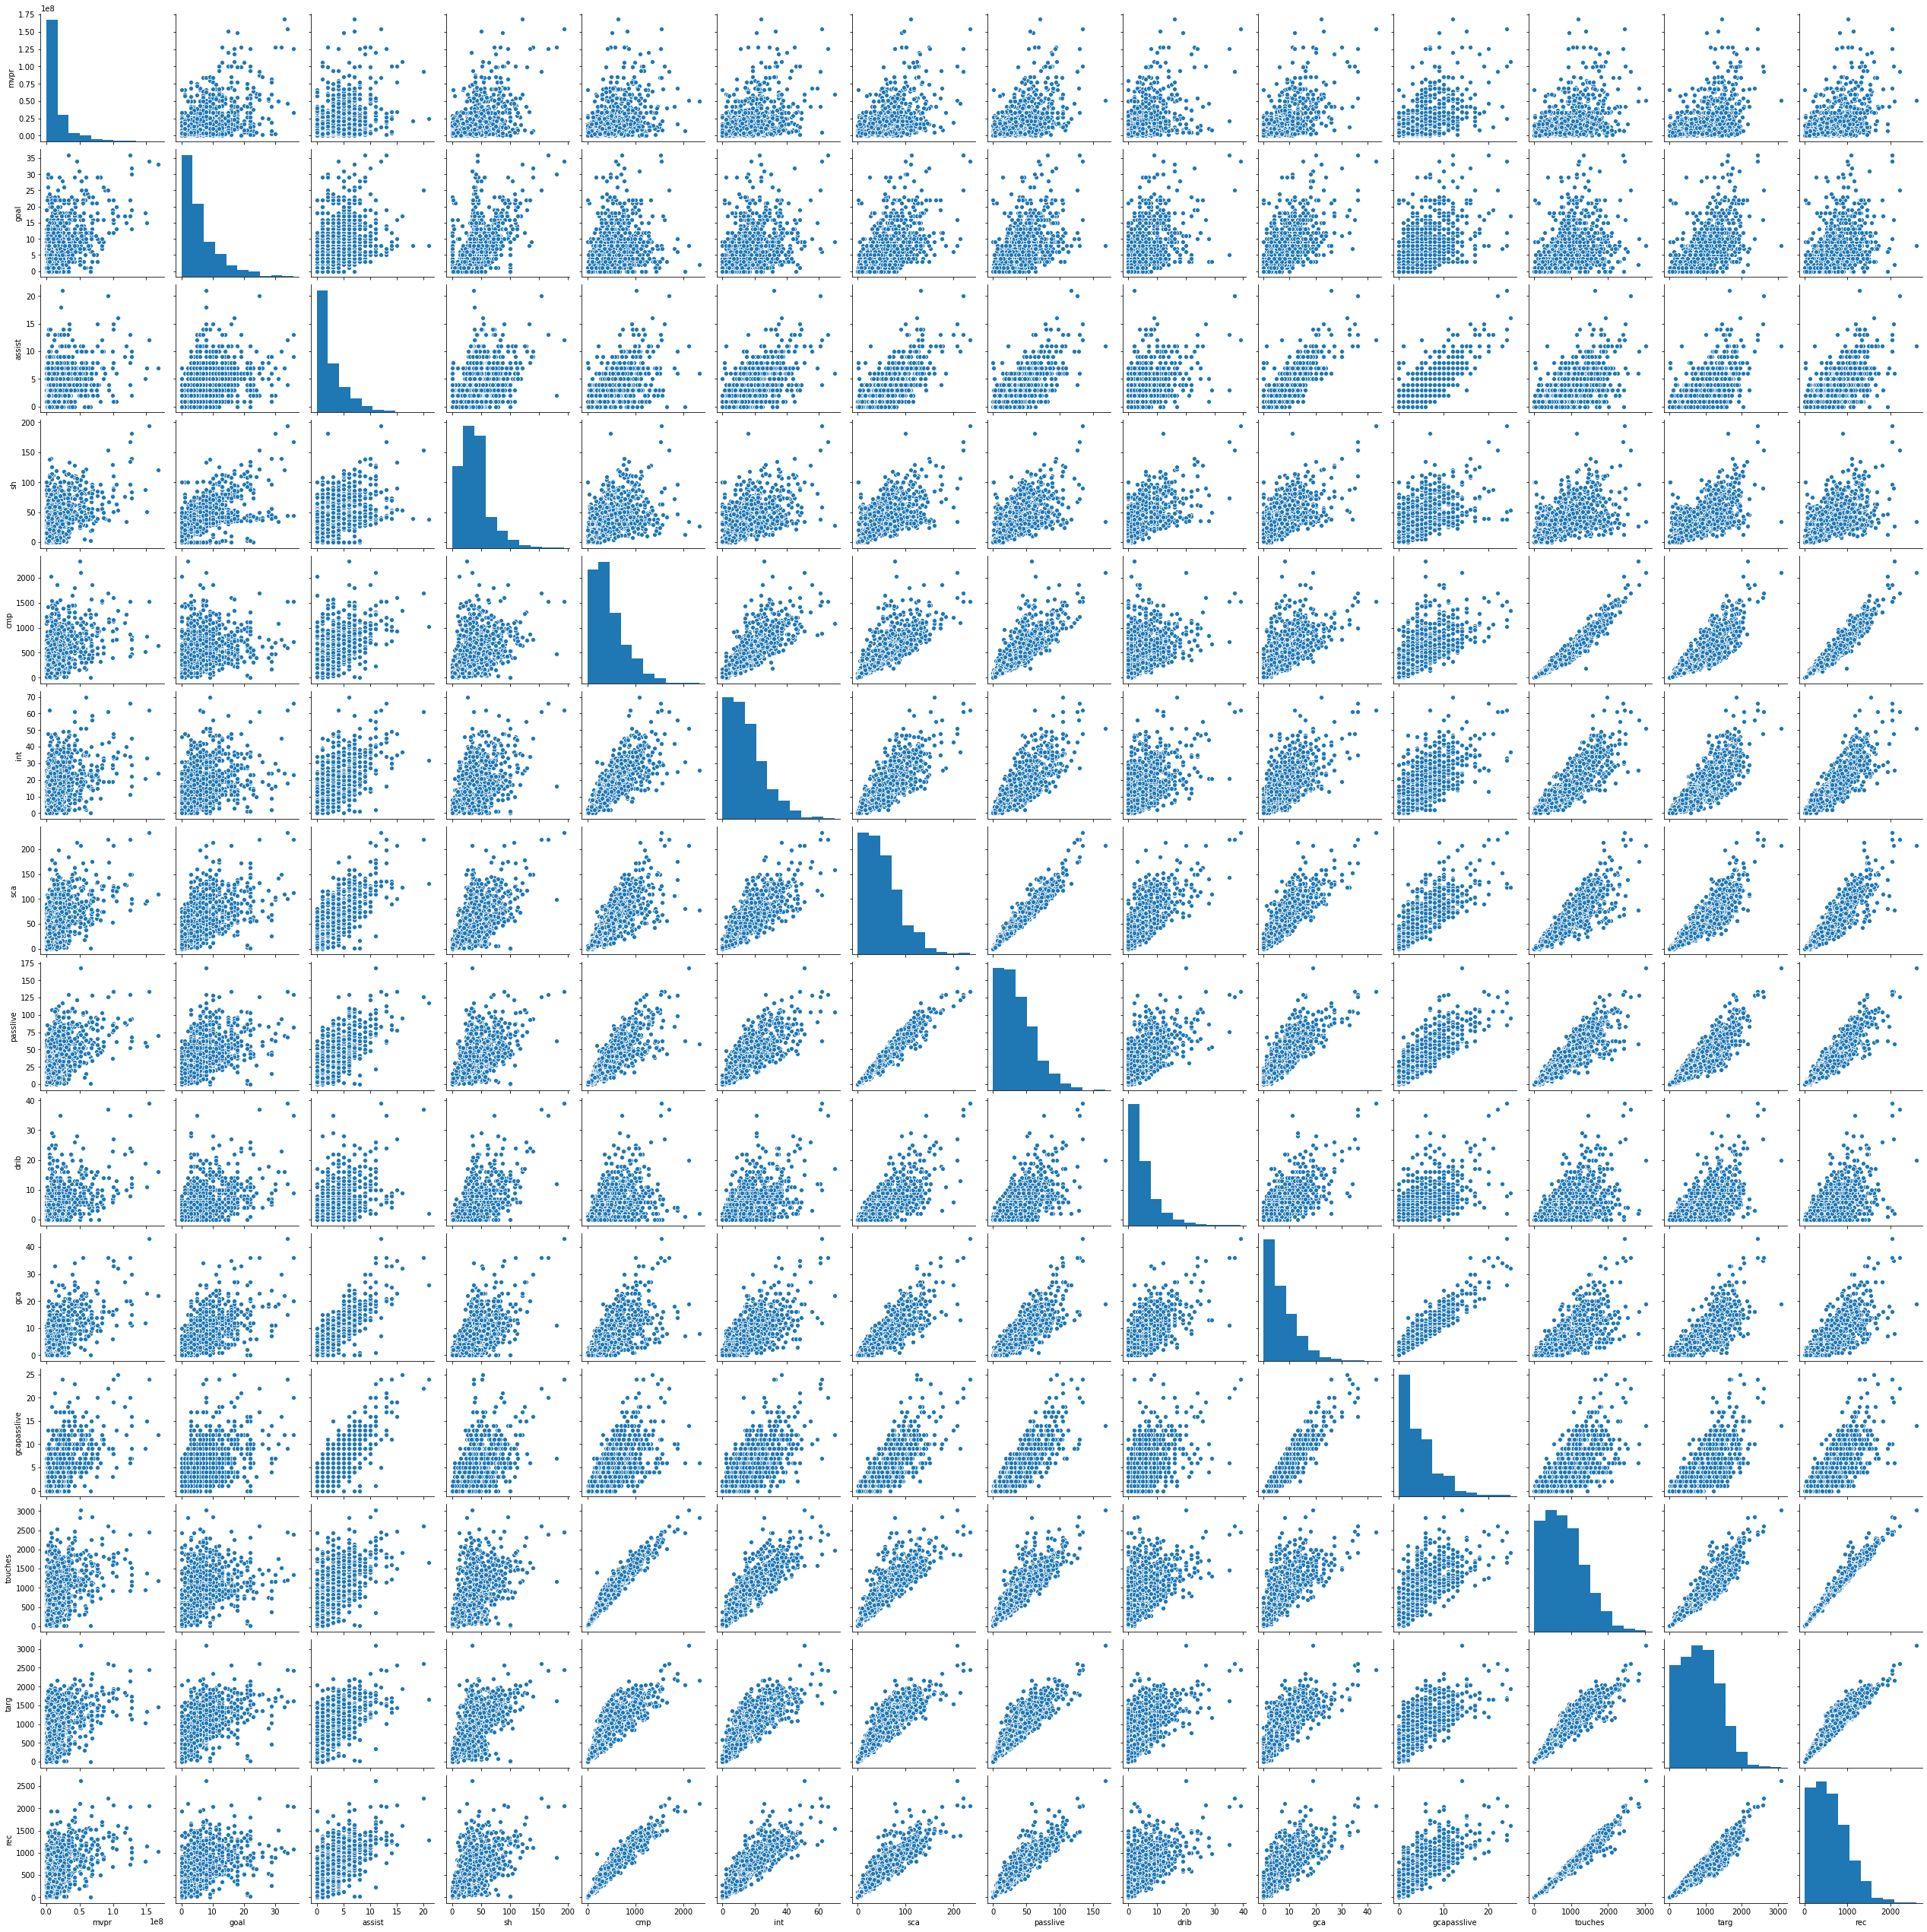

In [33]:
sns.pairplot(sal)

In [34]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# 다중공산성 확인
model = ols('mvpr~goal+assist+sh+cmp+int+sca+passlive+drib+gca+gcapasslive+touches+targ+rec', data=sal)
print(model.exog_names) # 독립변수 이름 확인

print(variance_inflation_factor(model.exog,1))
print(variance_inflation_factor(model.exog,2))
print(variance_inflation_factor(model.exog,3))
# print(variance_inflation_factor(model.exog,4))
print(variance_inflation_factor(model.exog,5))
# print(variance_inflation_factor(model.exog,6))
# print(variance_inflation_factor(model.exog,7))
print(variance_inflation_factor(model.exog,8))
# print(variance_inflation_factor(model.exog,9))
# print(variance_inflation_factor(model.exog,10))
# print(variance_inflation_factor(model.exog,11))
# print(variance_inflation_factor(model.exog,12))
# print(variance_inflation_factor(model.exog,13))


['Intercept', 'goal', 'assist', 'sh', 'cmp', 'int', 'sca', 'passlive', 'drib', 'gca', 'gcapasslive', 'touches', 'targ', 'rec']
2.7564150821221536
3.928919180592667
2.308311143744624
4.693013754173249
3.3312211075612628


In [52]:
result = ols('mvpr~goal+assist+sh+int+drib', data=sal).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   mvpr   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     173.2
Date:                Tue, 11 Aug 2020   Prob (F-statistic):          2.89e-138
Time:                        10:37:09   Log-Likelihood:                -21426.
No. Observations:                1185   AIC:                         4.286e+04
Df Residuals:                    1179   BIC:                         4.289e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.662e+06   9.73e+05     -1.707      0.0

In [53]:
# 손흥민 연봉 예측 값(다중회귀)
# j k l s w
predsal = -1.662e+06 + 1.22e+06*11 + 1.663e+06*10 + 8.138e+04*81 +1.254e+05*15 + 4.744e+05*15
predsal

43976780.0

In [55]:
marketvaluepred = 43976780 * 1.027 * 1.025 * 1.018 * 1.018
marketvaluepred

47974813.149645224